<a href="https://colab.research.google.com/github/Cardomomo/CHAPTER-4-DATA-1A/blob/main/ccopiaEDAFINAL_TORRESARJONACAROLINA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXPLORATORY DATA ANALYSIS - ABULONS
## CAROLINA TORRES ARJONA. DATA 3A.
## October 18th, 2021.

* Data Selected: Abalone Data Set
* Extracted from: https://archive.ics.uci.edu/ml/datasets/abalone
* Edition of the .data: The data set was edited by adding the name of each column given in the same web site.

#### LINK TO COLAB AND DATA TXT:
* https://colab.research.google.com/drive/1PyS5RHE_TErwEAgH89WJqpIGLhcn0Ogz?usp=sharing


*  **note:** The *abalones.txt* is attached in case of not being found in the google colaboratory, please add it to the sample folder: https://upy-my.sharepoint.com/:f:/g/personal/2009133_upy_edu_mx/Euc7-sDN_OxOpSm1qSMwmtsB0b-ez9ZZVzS9cxrN9j4bgg?e=zYqB4K

## a) INTRODUCTION

The data set selected was information collected in terms of the main characteristics of the creatures, the abalones. Looking for a relationship between most the variates. It was based on 8 attributes where there was no miising values, so there was no need to clean the set. With a sample of 4177 could have been found many relationships but it was not the case.


In [ ]:
pip install pandas-profiling==2.7.1

In [ ]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

In [ ]:
aba=pd.read_csv('sample_data/abalone.txt')


It was researched about the abalones to find out that some of the attributes given by the data set were unnecessary, despite of this information, the relationship was still searched.
The edited data set was loaded into the colab environment. 
**Overview:**

In [ ]:
aba

SEX  LENGHT  DIAMETER  ...  VISCERA WEIGHT  SHELL WEIGHT  RINGS
0      M   0.455     0.365  ...          0.1010        0.1500     15
1      M   0.350     0.265  ...          0.0485        0.0700      7
2      F   0.530     0.420  ...          0.1415        0.2100      9
3      M   0.440     0.365  ...          0.1140        0.1550     10
4      I   0.330     0.255  ...          0.0395        0.0550      7
...   ..     ...       ...  ...             ...           ...    ...
4172   F   0.565     0.450  ...          0.2390        0.2490     11
4173   M   0.590     0.440  ...          0.2145        0.2605     10
4174   M   0.600     0.475  ...          0.2875        0.3080      9
4175   F   0.625     0.485  ...          0.2610        0.2960     10
4176   M   0.710     0.555  ...          0.3765        0.4950     12

[4177 rows x 9 columns]

Having seen this information, the variable sex was spotted to find some differences, of course some variates were found relational and it was confirmed by adding a code line to have a deeper analysis of the data.

In [ ]:
profile=ProfileReport(aba)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

This Pearson’s r graphic correlation helped to identify and confirm the obvious relationship between most of the variables, since almost all of them are about the size of the abalones, so it makes sense that most of them are in blue range. The only one who seems to be far to be close of the variables was rings.

* Shucked weight: Peso sin caparazon (mojado)
* Visceral weight: Peso de lo que es de consumo humano
* Shell weight: Peso del caparazon

## b) UNIVARIATE ANALYSIS
To have a better overview of the variables, the same deep analysis showed a better way to take a look into the information of each variable. Where, as it was already mentioned, the whole weight was highly related to the other variables. Go back to: 

    profile=ProfileReport(aba)
    profile.to_notebook_iframe()

  To the section: **variables**

In [ ]:
import matplotlib.pyplot as plt
# IMPORTING PLT TO GRAPHIC


Since the sex classification seemed to be a predictor, it was asked for a better description of this column with the other columns by:

In [ ]:
scg=aba.groupby('SEX')
scg.describe()

LENGHT                                    ... RINGS                       
      count      mean       std    min    25%  ...   min  25%   50%   75%   max
SEX                                            ...                             
F    1307.0  0.579093  0.086160  0.275  0.525  ...   5.0  9.0  10.0  12.0  29.0
I    1342.0  0.427746  0.108858  0.075  0.360  ...   1.0  6.0   8.0   9.0  21.0
M    1528.0  0.561391  0.102697  0.155  0.505  ...   3.0  9.0  10.0  12.0  27.0

[3 rows x 64 columns]

And by itself and in order to give an idea of the dimensions, a pie graph was made, but also a description of the column to know its unique elements and frequency; meanwhile the previous table makes a description of the quartiles, mean, and std from each column.



In [ ]:
aba['SEX'].describe()

count     4177
unique       3
top          M
freq      1528
Name: SEX, dtype: object

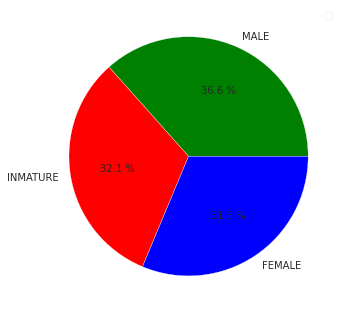

In [ ]:
y_values = aba['SEX'].value_counts().tolist()
f = aba['SEX'].value_counts()
percentage=(f*100)/4177
percentage=percentage.tolist()
sexlabel=["MALE","INMATURE","FEMALE"]
plt.legend(['PERCENTAGES OF SEX'])
plt.pie(y_values,labels=sexlabel,colors=['g','r','b'],autopct="%0.1f %%")
plt.show()
plt.close('all')

And since rings was still a no-related variable, it was described also by two methods: Graphical and non-graphical:


* Non-graphical:
Overview information of the coumn 'RINGS' are showed up, like the mean, std and quartiles, also which is the max value.

In [ ]:
aba['RINGS'].describe()

count    4177.000000
mean        9.933684
std         3.224169
min         1.000000
25%         8.000000
50%         9.000000
75%        11.000000
max        29.000000
Name: RINGS, dtype: float64

* Graphical: Finding that the mode was 15 rings, a data that cannot be obtained from:


    .describe()

But making a bar plot there are visible certain details.


<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
[15  7  9 10  8 20 16 19 14 11 12 18 13  5  4  6 21 17 22  1  3 26 23 29
  2 27 25 24]
[689, 634, 568, 487, 391, 267, 259, 203, 126, 115, 103, 67, 58, 57, 42, 32, 26, 15, 14, 9, 6, 2, 2, 1, 1, 1, 1, 1]


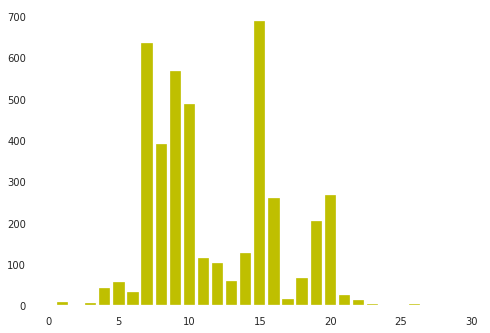

In [ ]:
print(type(aba['RINGS']))
x_values = aba['RINGS'].unique()
print(type(x_values))
print(x_values)
y_values = aba['RINGS'].value_counts().tolist()
print(y_values)
plt.bar(x_values, y_values,color='y')
plt.show()
plt.close('all')

The rings variable was also tried to be described but finding that it was too much information to understand it was better to try to look for relations and classifications.

The information was classified by sex so it could be able to find if there was a big difference, and since the population: male, female, immature was almost at 33% each one, it was workable to find verity into this analysis.

In [ ]:
sx = aba['SEX']
rf = aba['RINGS']
femR=[]
malR=[]
inmR = []
for i in range(0,len(aba['SEX'])):
  if(sx[i]=='M'):
    malR.append(rf[i])
  elif(sx[i]=='F'):
    femR.append(rf[i])
  else:
    inmR.append(rf[i])
  

print(malR)
print(femR)
print(inmR)

[15, 7, 10, 9, 10, 11, 12, 7, 9, 11, 12, 15, 11, 10, 18, 8, 9, 9, 7, 10, 7, 8, 8, 7, 9, 7, 8, 8, 13, 11, 9, 12, 21, 14, 13, 10, 15, 12, 13, 15, 14, 9, 8, 7, 15, 15, 10, 12, 9, 9, 9, 10, 8, 6, 19, 18, 17, 9, 9, 16, 11, 10, 10, 15, 10, 16, 13, 12, 14, 14, 14, 8, 11, 14, 21, 13, 13, 12, 14, 12, 16, 15, 10, 13, 8, 7, 9, 10, 8, 10, 13, 14, 22, 17, 13, 15, 15, 19, 10, 11, 6, 14, 8, 9, 16, 14, 15, 13, 22, 18, 20, 14, 14, 10, 9, 17, 15, 26, 11, 9, 8, 6, 13, 14, 10, 14, 19, 23, 10, 11, 7, 12, 8, 12, 11, 14, 16, 13, 14, 12, 13, 14, 12, 9, 16, 20, 13, 17, 18, 19, 11, 12, 13, 11, 15, 15, 10, 10, 12, 10, 12, 10, 14, 10, 8, 12, 11, 9, 8, 16, 11, 8, 15, 14, 12, 20, 13, 13, 19, 20, 18, 22, 11, 9, 13, 13, 16, 12, 16, 11, 11, 13, 21, 17, 17, 21, 16, 17, 15, 12, 11, 11, 14, 13, 15, 17, 10, 15, 12, 15, 11, 6, 6, 9, 5, 4, 3, 5, 4, 4, 3, 9, 7, 5, 15, 8, 11, 8, 7, 10, 7, 14, 12, 9, 10, 12, 4, 9, 13, 7, 9, 7, 10, 10, 10, 9, 8, 7, 6, 7, 7, 9, 6, 9, 5, 7, 7, 11, 13, 14, 21, 12, 10, 16, 10, 15, 11, 11, 10, 9, 5,


With this split, it was possible to make a graph per sex and find some irregularities:

<class 'numpy.ndarray'>


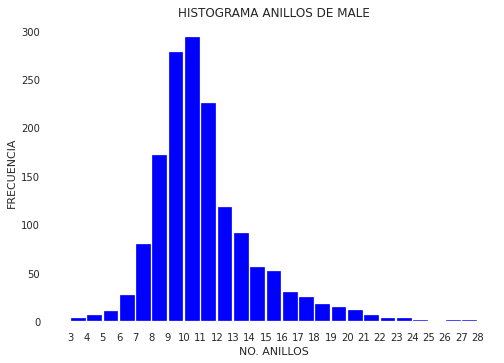

In [ ]:
malR=np.array(malR)
print(type(malR))

intervalos = range(min(malR), max(malR) + 2) #calculamos los extremos de los intervalos

plt.hist(x=malR, bins=intervalos, color='b', rwidth=0.9)
plt.title('HISTOGRAMA ANILLOS DE MALE')
plt.xlabel('NO. ANILLOS')
plt.ylabel('FRECUENCIA')
plt.xticks(intervalos)

plt.show()

<class 'numpy.ndarray'>


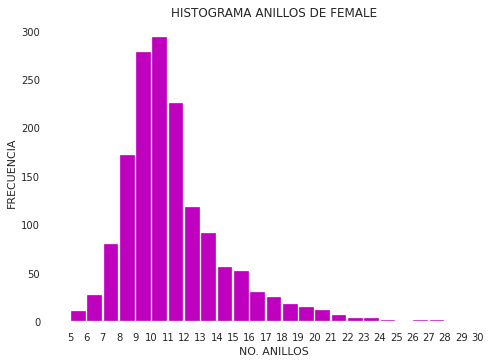

In [ ]:
femR=np.array(femR)
print(type(femR))

intervalos = range(min(femR), max(femR) + 2) #calculamos los extremos de los intervalos

plt.hist(x=malR, bins=intervalos, color='m', rwidth=0.9)
plt.title('HISTOGRAMA ANILLOS DE FEMALE')
plt.xlabel('NO. ANILLOS')
plt.ylabel('FRECUENCIA')
plt.xticks(intervalos)

plt.show()

<class 'numpy.ndarray'>


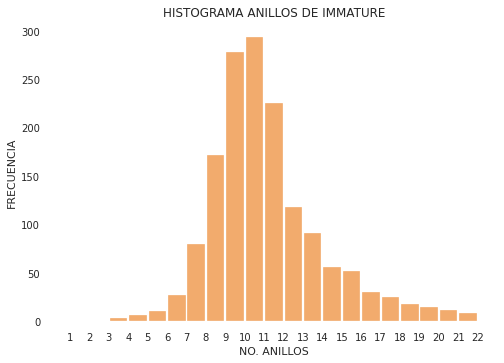

In [ ]:
inmR=np.array(inmR)
print(type(inmR))

intervalos = range(min(inmR), max(inmR) + 2) #calculamos los extremos de los intervalos

plt.hist(x=malR, bins=intervalos, color='#F2AB6D', rwidth=0.9)
plt.title('HISTOGRAMA ANILLOS DE IMMATURE')
plt.xlabel('NO. ANILLOS')
plt.ylabel('FRECUENCIA')
plt.xticks(intervalos)

plt.show()

At first look, the data seemed to be
proportioned and no relation was found.

## c) MULTIVARIATE

As it was mentioned before, no relationship between the sex and number of rings was found, in fact a lack of attribute was mentioned, the age. An apparent important information that was indeed related to the size and number of rings of the abalones.

By notes of a classmate, it was recognized that indeed it was an irregularity non seen during the ring graphing, so a box plot was made be able to make obvious this irregularity.

* On this box plot, the maximum value of rings (29 rings) is focused on the female field, but still being somehow even with the male, but analyzing that the immature field was odd in comparison with the others seems to answer the relation question made about if the age or sex were a decisive factor.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


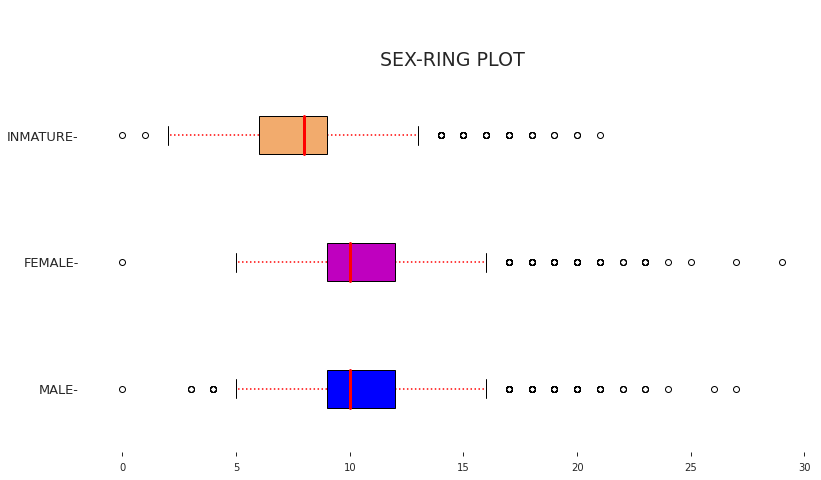

In [ ]:
  
data = [malR,femR,inmR] 
  
fig = plt.figure(figsize =(13, 7)) 
ax = fig.add_subplot(111) 
  
bp = ax.boxplot(data, patch_artist = True, 
                 vert = 0) 
  
colors = ['b', 'm',  
          '#F2AB6D'] 
  
for patch, color in zip(bp['boxes'], colors): 
    patch.set_facecolor(color) 
  
for whisker in bp['whiskers']: 
    whisker.set(color ='r', 
                linewidth = 1.5, 
                linestyle =":") 
  
for median in bp['medians']: 
    median.set(color ='red', 
               linewidth = 3) 
  
      
ax.set_yticklabels(['MALE-', 'FEMALE-','INMATURE-'],fontsize=13)
  
plt.title("\n\nSEX-RING PLOT",fontsize=19) 
  
ax.get_xaxis().tick_bottom() 
      
plt.show() 

But in the looking for a relationship, the variables weight and height were also contrasted, **despite not being a multivariate graph**, it seems important to demonstrate the lack of relation.

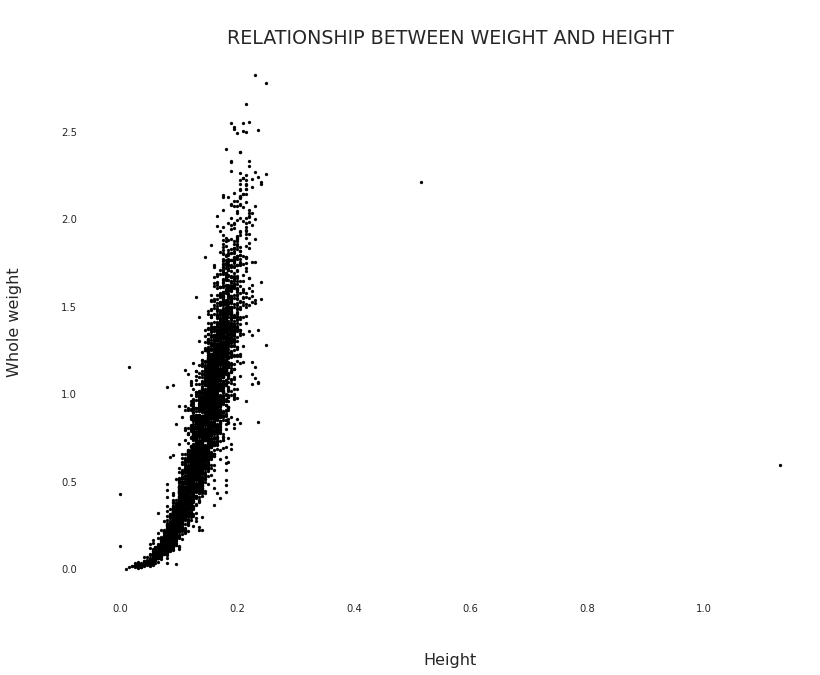

In [ ]:

fig, ax = plt.subplots(1, 1, figsize=(13,10))
ax.scatter(x=aba['HEIGHT'], y=aba['WHOLE WEIGHT'], alpha= 1, s=9,color='k')
ax.set_xlabel('\n\nHeight',fontsize=16);
ax.set_ylabel('Whole weight\n\n',fontsize=16);
plt.title("\nRELATIONSHIP BETWEEN WEIGHT AND HEIGHT",fontsize=19)
plt.show()
#NO RELATIONSHIP!!!!!

And trying to make a multivriate graph it appears the test of relation between each row and column, looking for a proportion of the three 'weight' which conforms the 'total weight'.

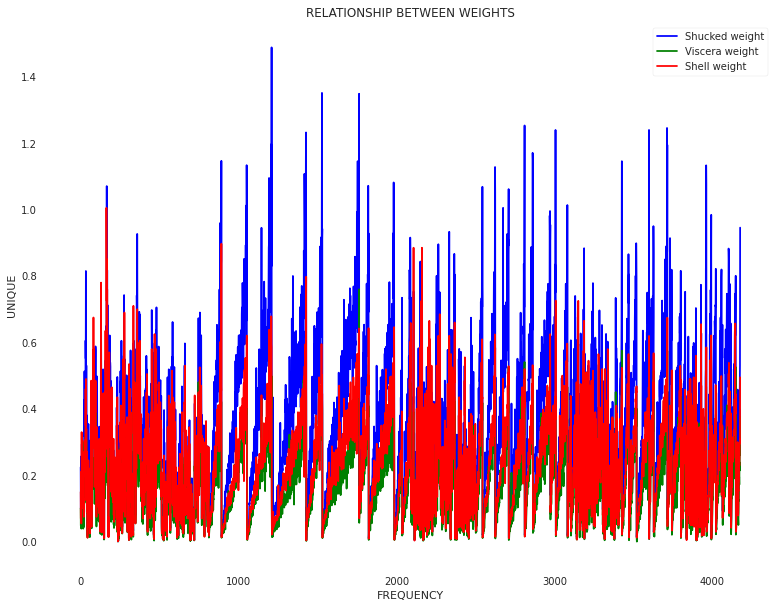

In [ ]:
fig, ax = plt.subplots(figsize=(13,10))  

ax.plot(aba['SHUCKED WEIGHT'], 'b')  
ax.plot(aba['VISCERA WEIGHT'], 'g')  
ax.plot(aba['SHELL WEIGHT'], 'r')  
ax.legend(loc='upper right', labels=['Shucked weight', 'Viscera weight','Shell weight'])
ax.set_xlabel('FREQUENCY')  
ax.set_ylabel('UNIQUE')  
ax.set_title('RELATIONSHIP BETWEEN WEIGHTS')  



plt.show()

## d) CONCLUSION

The exploratory analysis can make an overview and not too detailed data from which we can be able to infer some theories. In this data set no apparent relation was linked
but we could find irregularities that can make us realize that value is there because it can be a missing factor to consider, and even when there are variables that seem not worth to analyze, those variables cannot be seen in the correct spotlight, which means that making use of the correct tools, these kind of data might tell us important information. The deductions inferred on this set were that identifying the difference between the developed sex (male and female), and the immature, could be a possibility, and that the maximum found on the female field could be an important fact, but the real difference is the age of each abalones, and then we can argue that the maximum found was because that abalone besides being female, it was older than the other studied on the sample.

### REFERENCES

* Blog, G. (2021, 30 julio). Exploratory Data Analysis(EDA) from Scratch | With Pythin Implementation. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2020/08/exploratory-data-analysiseda-from- scratch-in-python/

* Santos, P. J. D. L. (2018, 13 diciembre). Gráficas de pastel con Matplotlib. Numython. https://numython.github.io/posts/graficas-de-pastel-con-matplotlib/

* Dan, A. (2020, 19 octubre). Exploratory Data Analysis (EDA) in Python - Atanu Dan. Medium. https://medium.com/@atanudan/exploratory-data-analysis-eda-in-python- 893f963cc0c0

* Bro, P. (s. f.). Gráfica de Barras con Matplotlib y Python [Con Ejemplos]. Python Bros. https://pythonbros.com/grafica-de-barras-con-matplotlib/